<a href="https://colab.research.google.com/github/Miguel743/proyectosDatos/blob/main/ModeloClasificacion_Encuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install funpymodeling
!pip install pandas-profiling==2.7.1

import pandas as pd
from pandas_profiling import ProfileReport
from google.colab.data_table import DataTable
from funpymodeling.exploratory import status, profiling_num, freq_tbl, cat_vars,num_vars 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# 1a. Carga de datos 
import pickle
with open('/content/drive/MyDrive/data/data14_5.pickle', 'rb') as handle:
  data15= pickle.load(handle)

In [ ]:
status(data15)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,anos_de_experiencia,0,0.0,462,0.080586,23,int64
1,tipo_de_contrato_Full-Time,0,0.0,852,0.148613,2,uint8
2,tipo_de_contrato_Part-Time,0,0.0,5474,0.954823,2,uint8
3,tipo_de_contrato_Participación societaria en u...,0,0.0,5719,0.997558,2,uint8
4,tipo_de_contrato_Remoto (empresa de otro país),0,0.0,5457,0.951858,2,uint8
5,tipo_de_contrato_Tercerizado (trabajo a través...,0,0.0,5562,0.970173,2,uint8
6,seniority_Semi-Senior,0,0.0,4364,0.761207,2,uint8
7,seniority_Senior,0,0.0,2801,0.488575,2,uint8
8,seniority_nulo_seniority,0,0.0,5730,0.999477,2,uint8
9,tiene_gente_a_cargo_Sí,0,0.0,4259,0.742892,2,uint8


In [ ]:
data15.shape

(5733, 22)

In [ ]:
# 1b. Separacion en TR/TS
data15_x= data15.drop('salario_bruto_ALTO', axis=1)
data15_y= data15['salario_bruto_ALTO']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data15_x, data15_y, test_size= 0.2)

In [ ]:
# Creación del modelo predictivo: crearemos 500, 1000 y 1500 decision tree.
# 500 decision tree
from sklearn.ensemble import RandomForestClassifier
rf_500= RandomForestClassifier(n_estimators = 500, random_state = 99)

In [ ]:
rf_500.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=99)

In [ ]:
rf_1000= RandomForestClassifier(n_estimators = 1000, random_state = 99)
rf_1000.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=99)

In [ ]:
rf_1500= RandomForestClassifier(n_estimators = 1500, random_state = 99)
rf_1500.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1500, random_state=99)

In [ ]:
# Matriz de Confusion
from sklearn.metrics import plot_confusion_matrix

In [ ]:
sns.set(font_scale=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


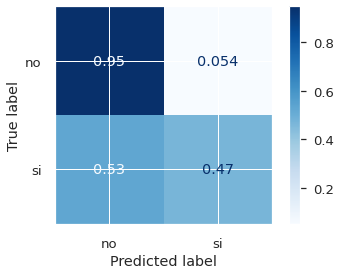

In [ ]:
plot_confusion_matrix(rf_500, x_train, y_train,
                      display_labels=['no','si'],
                      cmap='Blues',
                      normalize='true',
                     );

In [ ]:
# Generamos las matrices de confusión mediante crosstab() para cada modelo predictivo.
y_pred500=rf_500.predict(x_train)

sns.set(font_scale=1.5) #  Ajuste tamaño de letra (var global)
conf_mat500=pd.crosstab(index=y_train, # filas = valor real
                     columns=y_pred500, # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

y_pred1000=rf_1000.predict(x_train)

sns.set(font_scale=1.5) #  Ajuste tamaño de letra (var global)
conf_mat1000=pd.crosstab(index=y_train, # filas = valor real
                     columns=y_pred1000, # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

y_pred1500=rf_1500.predict(x_train)

sns.set(font_scale=1.5) #  Ajuste tamaño de letra (var global)
conf_mat1500=pd.crosstab(index=y_train, # filas = valor real
                     columns=y_pred1500, # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')



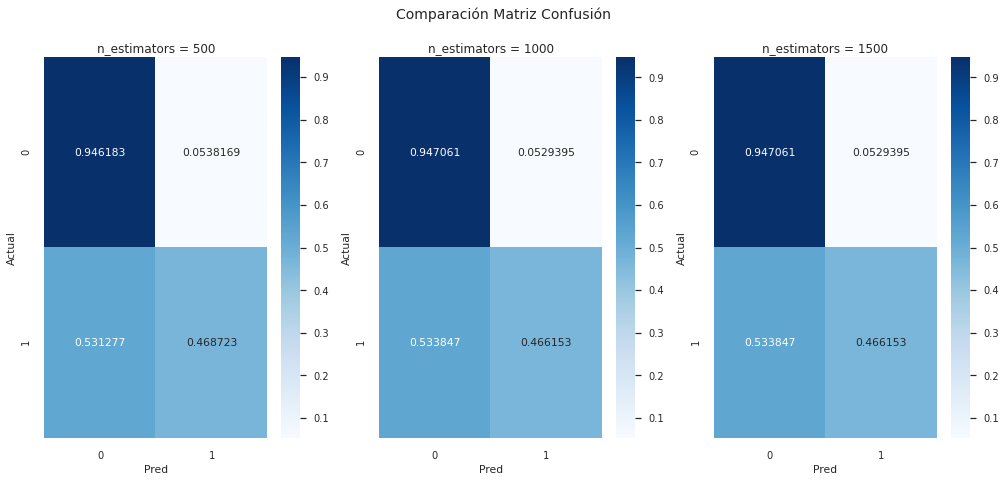

In [ ]:
# Graficamos
sns.set(font_scale=0.9)
fig, ax =plt.subplots(figsize=(17,7),nrows=1,ncols=3)

sns.heatmap(conf_mat500, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat1000, annot=True, cmap='Blues', fmt='g', ax=ax[1])
sns.heatmap(conf_mat1500, annot=True, cmap='Blues', fmt='g', ax=ax[2])

ax[0].set_title('n_estimators = 500', fontsize= 12)
ax[1].set_title('n_estimators = 1000', fontsize= 12)
ax[2].set_title('n_estimators = 1500', fontsize= 12)
fig.suptitle('Comparación Matriz Confusión', weight= 'light',size = 14)
fig.show(warn=False)

# No observamos ninguna mejora entre modelo con n_estimators= 1000 y n_estimators= 1500. Continuaremos trabajando con el modelo n_estimators= 1000.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


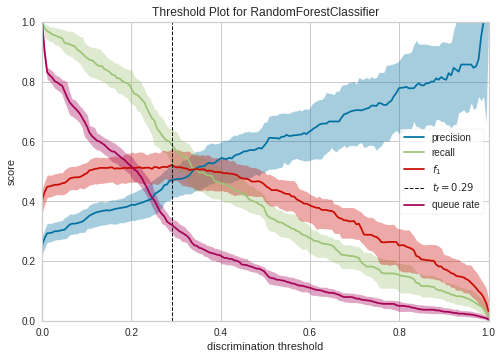

AttributeError: ignored

TypeError: ignored

In [ ]:
# Analisis de puntos de corte
from yellowbrick.classifier.threshold import discrimination_threshold

dis_res=discrimination_threshold(rf_1000, x_train, y_train)
dis_res

In [ ]:
sum(y_pred1000)

725

In [ ]:
pred_probs=rf_1000.predict_proba(x_train)
y_probs_tr= pred_probs[:,1]
y_pred1000_2=np.where(y_probs_tr > 0.29, 1, 0)

In [ ]:
# Matriz de confusión para punto de corte = 0.29

sns.set(font_scale=1.5) #  Ajuste tamaño de letra (var global)
conf_mat1000_2=pd.crosstab(index=y_train, # filas = valor real
                     columns=y_pred1000_2, # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')



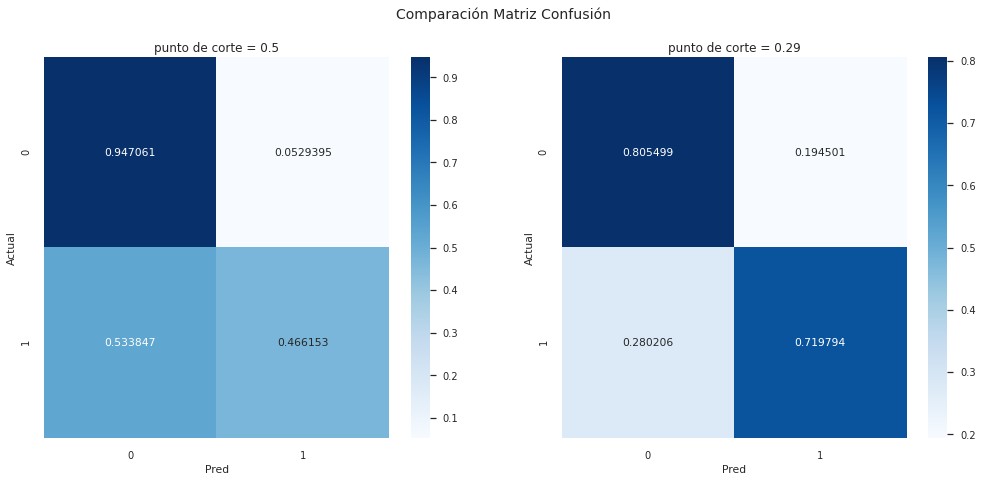

In [ ]:
# Comparamos Matrices de Confusion para punto de corte 0.5 y 0.29 con n_estimators = 1000
sns.set(font_scale=0.9)
fig, ax =plt.subplots(figsize=(17,7),nrows=1,ncols=2)

sns.heatmap(conf_mat1000, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat1000_2, annot=True, cmap='Blues', fmt='g', ax=ax[1])
#sns.heatmap(conf_mat1500, annot=True, cmap='Blues', fmt='g', ax=ax[2])

ax[0].set_title('punto de corte = 0.5', fontsize= 12)
ax[1].set_title('punto de corte = 0.29', fontsize= 12)
#ax[2].set_title('n_estimators = 1500', fontsize= 12)
fig.suptitle('Comparación Matriz Confusión', weight= 'light',size = 14)
fig.show(warn=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


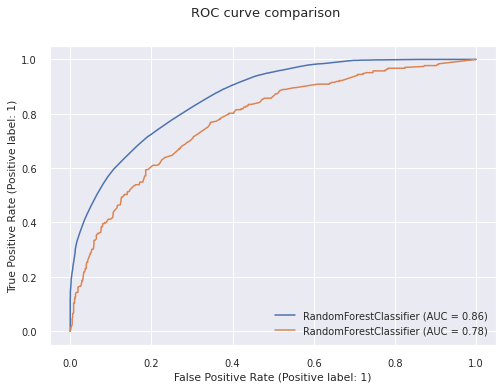

In [ ]:
# Graficamos Curva ROC para modelo n_estimators= 1000
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

tr_disp = plot_roc_curve(rf_1000, x_train, y_train)
ts_disp = plot_roc_curve(rf_1000, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


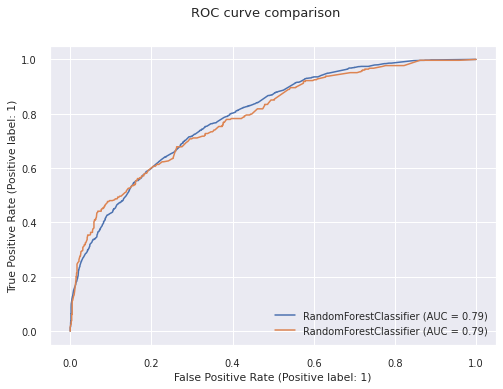

In [ ]:
# Graficamos Curva ROC para modelo n_estimators= 1000 y min_samples_leaf=40
rf_1000_40 = RandomForestClassifier(n_estimators = 1000, random_state = 99, min_samples_leaf=40)
rf_1000_40.fit(x_train, y_train)
tr_disp = plot_roc_curve(rf_1000_40, x_train, y_train)
ts_disp = plot_roc_curve(rf_1000_40, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()